In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [2]:
mask_y = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Face Mask Detection\with_mask 1\with_mask 1/*.jpeg") 
mask_n = glob.glob(r"C:\Users\Dell\Downloads\Capstone Project\Capstone Project\Face Mask Detection\without_mask\without_mask/*.jpg")  


In [3]:
image = []
label = []

for i in mask_y:
    img = plt.imread(i)
    image.append(img)
    label.append(1) 

for i in mask_n:
    img = plt.imread(i)
    image.append(img)
    label.append(0) 
    


In [4]:
from sklearn.utils import shuffle
image,label=shuffle(image,label,random_state=100)

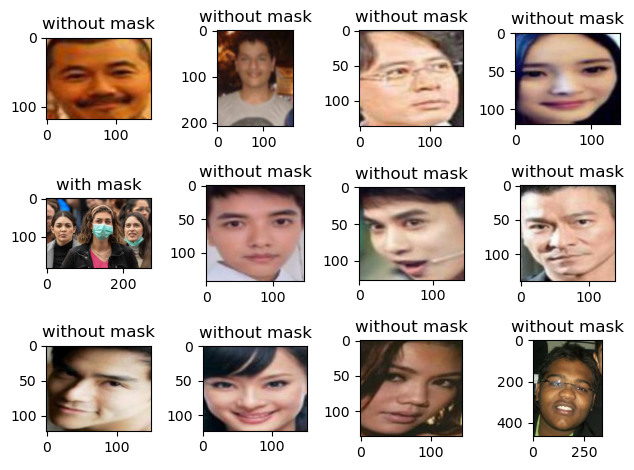

In [5]:
#plt.figure(figsize=(12,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i]==0:
        plt.title("without mask")
    else:
        plt.title("with mask")

plt.tight_layout()
plt.show()

In [6]:
from skimage.transform import resize

X=[]
for i in image:
    X.append(resize(i,(64,64,3)))
X= np.array(X)

y=np.array(label)

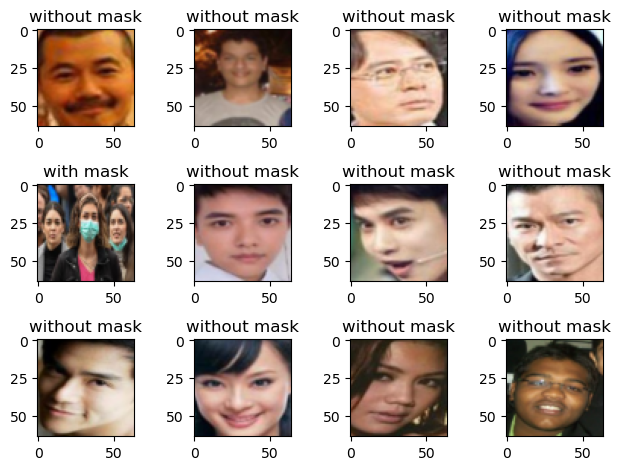

In [7]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X[i])
    if y[i]==0:
        plt.title("without mask")
    else:
        plt.title("with mask")

plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Input

model=Sequential([
    Input(shape=(64,64,3)),
    Conv2D(16,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
    
])

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 26s 348ms/step - accuracy: 0.9224 - loss: 0.2704 - val_accuracy: 0.9318 - val_loss: 0.2066
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9586 - loss: 0.1245 - val_accuracy: 0.9318 - val_loss: 0.1669
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9648 - loss: 0.0795 - val_accuracy: 0.9318 - val_loss: 0.1554
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9737 - loss: 0.0595 - val_accuracy: 0.9470 - val_loss: 0.1396
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9750 - loss: 0.0711 - val_accuracy: 0.9470 - val_loss: 0.1888
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9841 - loss: 0.0428 - val_accuracy: 0.9621 - val_loss: 0.1394
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9907 - loss: 0.0374 - val_accuracy: 0.9470 - val_loss: 0.1585
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9864 - loss: 0.0431 - val_accuracy: 0.9621 -

In [12]:
y_pred=(model.predict(X_test) > 0.5).astype(int)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [13]:
y_pred[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [14]:
np.unique(y_pred)

array([0, 1])

In [32]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
    

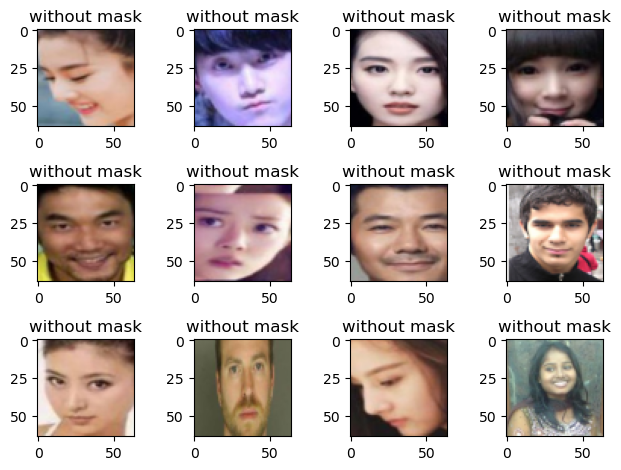

In [15]:
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    if y_pred[i]==0:
        plt.title("without mask")
    else:
        plt.title("with mask")

plt.tight_layout()
plt.show()